### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Load data

In [ ]:
df1 = pd.read_csv("/content/df1.csv")
df2 = pd.read_csv("/content/df2.csv")

In [ ]:
df_merged = merged_df = pd.merge(df1, df2, on="EmployeeNumber", how = "left")

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [ ]:
df_merged.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
attrition_data = df_merged.copy()

Eksportujemy nullowe dane z Attrition do osobnego df

In [ ]:
test_df = attrition_data[attrition_data.isnull().any(axis=1)]

# data frame do testowania, konkursowy

In [ ]:
test_df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1323,100000,35.0,Travel_Rarely,1343.0,Research & Development,27.0,1.0,Medical,1.0,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,17852.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0
1324,100001,27.0,Travel_Rarely,1220.0,Research & Development,5.0,3.0,Life Sciences,1.0,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,20938.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0
1325,100002,24.0,Travel_Rarely,1476.0,Sales,4.0,1.0,Medical,1.0,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,15211.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0
1326,100003,37.0,Non-Travel,142.0,Sales,9.0,4.0,Medical,1.0,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,24666.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0
1327,100004,33.0,Travel_Rarely,527.0,Research & Development,1.0,4.0,Other,1.0,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,5207.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0


In [ ]:
# usuwamy nullowe dane z attrition_data

attrition_data = attrition_data.dropna(how='any',axis=0)

#nie chcemy usuwać kolumn, tylko wiersze, dlatego dajemy axis = 0

#axis 0 says: i want you to move down in operations, across rows
#axis 1 says: i want you to move along the column axis

### Clean, Prepare & Features Engineering
1. Imputation (missing data)
2. Handling outliers 
3. Binning (pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"]))
4. One-hot encoding (pd.get_dummies)
5. Duplicates
6. Extracting the parts of the date into different columns
7. Scaling (Normalization/Standardization)

In [ ]:
attrition_data.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
attrition_data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,800.843794,34478.313343,2.906788,1.0,2.719665,66.036495,2.741516,2.051604,2.722920,6453.266853,14266.381450,2.677359,15.164110,3.146444,2.725709,80.0,0.787773,354.004649,2.803347,2.765923,312.854719,367.109484,399.000930,334.767550,77439.202232
std,2643.040205,1591.153416,405.655763,147682.315767,1.026460,0.0,1.092333,20.298352,0.711379,1.102569,1.106692,4672.993959,7154.584275,2.490632,3.624112,0.353591,1.079747,0.0,0.849147,1508.016854,1.302586,0.708878,1373.999529,1480.107024,1597.939659,1431.991884,56075.927510
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7910.250000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14174.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6903.750000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8307.750000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99693.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

Wizualizujemy rozrzut danych

In [ ]:
# funkcja pokazująca rozrzut danych

def describe(df, column):
  print("Null: ", df[column].isna().sum())
  print("###")
  print("describe: ", df[column].describe())
  print("Histogram, boxplot i scatterplot:")
  fig, axs = plt.subplots(3,1, figsize = (18,10))
  axs[0].hist(df[column])
  axs[1].boxplot(df[column], vert = False)
  axs[2].scatter(df[column], df['Attrition'])

  axs[2].set_xlabel(column)
  axs[2].set_ylabel('Attrition')

Null:  0
###
describe:  count      4302.000000
mean      34478.313343
std      147682.315767
min           1.000000
25%           2.000000
50%           8.000000
75%          17.000000
max      999590.000000
Name: DistanceFromHome, dtype: float64
Histogram, boxplot i scatterplot:


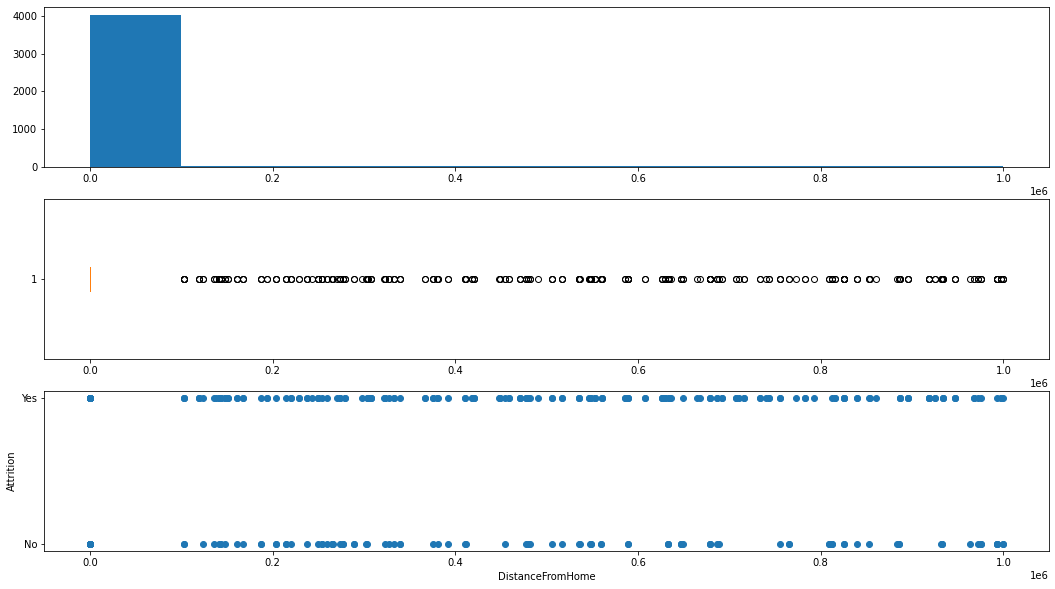

In [ ]:
describe(attrition_data, "DistanceFromHome")

Null:  0
###
describe:  count    4302.000000
mean      429.123199
std      1591.153416
min        18.000000
25%        31.000000
50%        36.000000
75%        45.000000
max      9890.000000
Name: Age, dtype: float64
Histogram, boxplot i scatterplot:


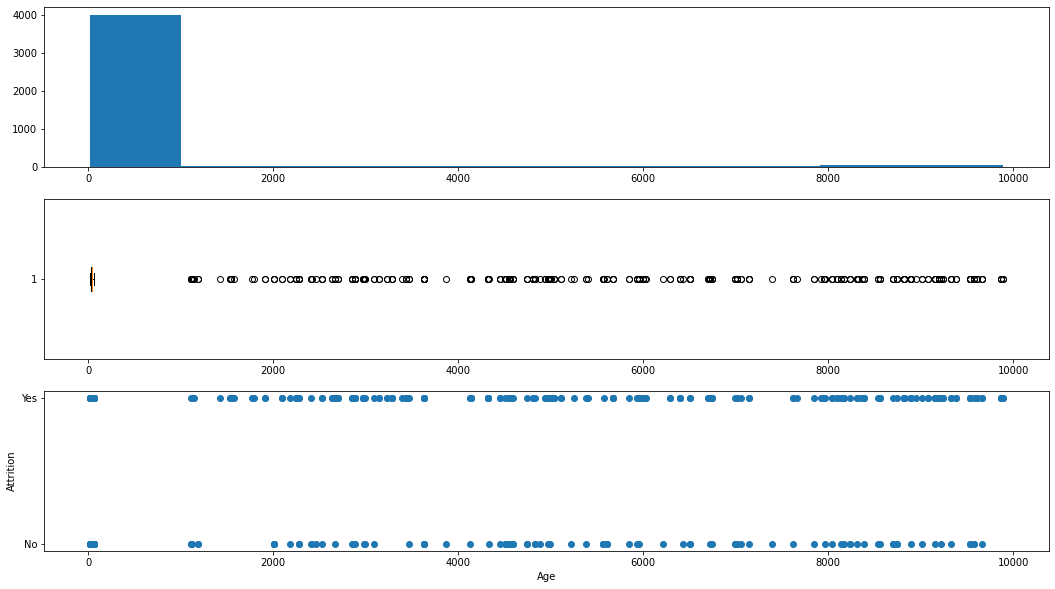

In [ ]:
describe(attrition_data, "Age")

Null:  0
###
describe:  count      4302.000000
mean      77439.202232
std       56075.927510
min       12108.000000
25%       34764.000000
50%       58512.000000
75%       99693.000000
max      239988.000000
Name: YearlyIncome, dtype: float64
Histogram, boxplot i scatterplot:


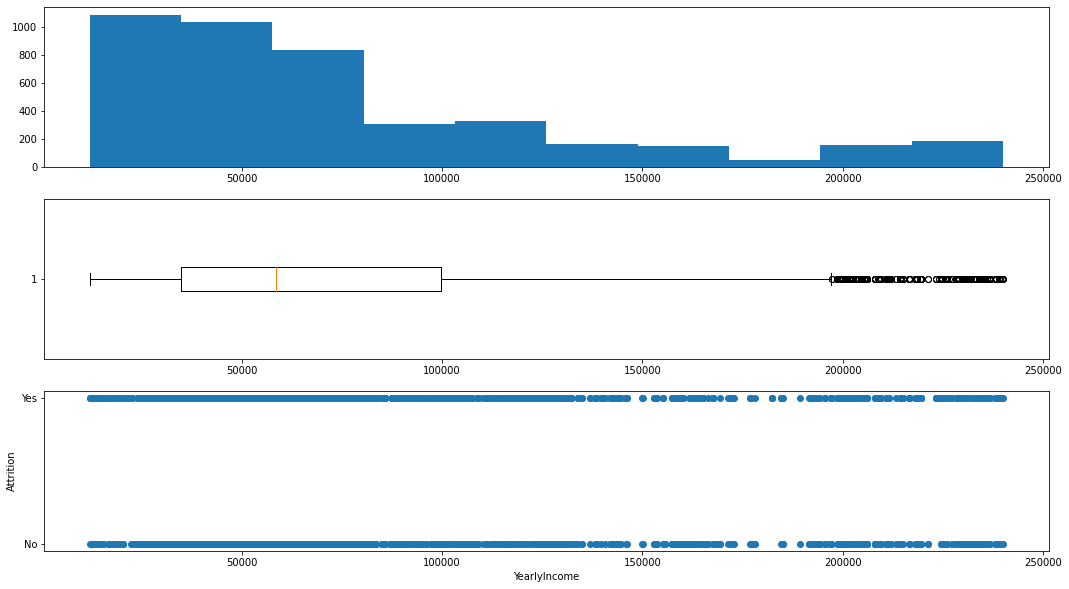

In [ ]:
describe(attrition_data, "YearlyIncome")

Null:  0
###
describe:  count    4302.000000
mean      334.767550
std      1431.991884
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      9882.000000
Name: YearsWithCurrManager, dtype: float64
Histogram, boxplot i scatterplot:


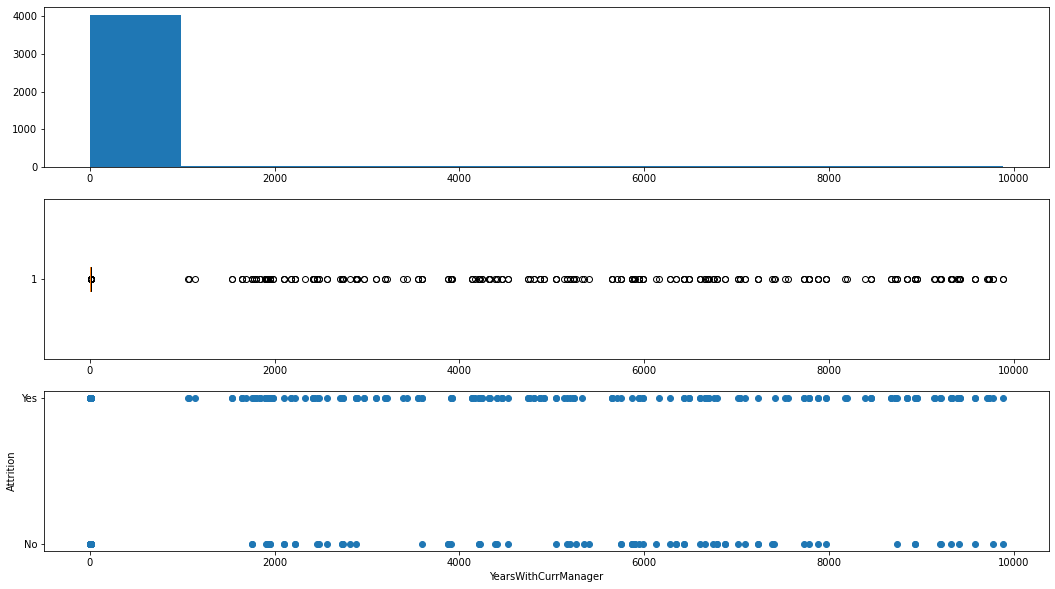

In [ ]:
describe(attrition_data, "YearsWithCurrManager")

(array([2595.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1707.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

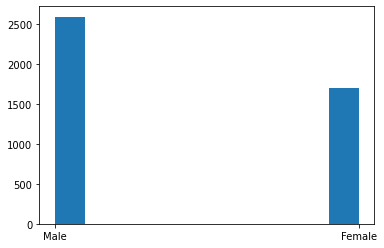

In [ ]:
fig, ax = plt.subplots()
ax.hist(attrition_data.Gender)

## Usuwamy duplikaty i outliersy

In [ ]:
# usuwamy duplikaty

new = attrition_data.drop_duplicates(subset=attrition_data.columns.difference(['EmployeeNumber']))

In [ ]:
# filtrujemy wiek powyżej 60 roku życia

new[new.Age > 60]

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1479,5010,8825.0,Travel_Rarely,1107.0,Human Resources,9.0,4.0,Technical Degree,1.0,1.0,Female,52.0,3.0,1.0,Human Resources,3.0,Married,2742.0,3072.0,1.0,Y,No,15.0,3.0,4.0,80.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,Yes,32904.0
1499,5030,3628.0,Travel_Frequently,544.0,Sales,3.0,2.0,Medical,1.0,2.0,Female,70.0,3.0,1.0,Sales Representative,4.0,Single,1569.0,18420.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,Yes,18828.0
1517,5048,6287.0,Travel_Rarely,1265.0,Research & Development,3.0,3.0,Life Sciences,1.0,3.0,Female,95.0,4.0,2.0,Laboratory Technician,4.0,Married,5231.0,23726.0,2.0,Y,Yes,13.0,3.0,2.0,80.0,1.0,17.0,1.0,2.0,5.0,3.0,1.0,3.0,Yes,62772.0
1523,5054,9330.0,Travel_Frequently,306.0,Sales,26.0,4.0,Life Sciences,1.0,1.0,Female,100.0,3.0,2.0,Sales Executive,1.0,Married,4286.0,5630.0,2.0,Y,No,14.0,3.0,4.0,80.0,2.0,5.0,4.0,3.0,1.0,1.0,0.0,0.0,No,51432.0
1524,5055,9330.0,Travel_Frequently,306.0,Sales,26.0,4.0,Life Sciences,1.0,1.0,Female,100.0,3.0,2.0,Sales Executive,1.0,Married,4286.0,5630.0,2.0,Y,No,14.0,3.0,4.0,80.0,2.0,5.0,4.0,3.0,1.0,1.0,0.0,0.0,Yes,51432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,7865,1775.0,Travel_Rarely,922.0,Research & Development,3.0,2.0,Life Sciences,1.0,1.0,Female,39.0,3.0,1.0,Laboratory Technician,4.0,Divorced,2835.0,2561.0,5.0,Y,No,22.0,4.0,1.0,80.0,1.0,7.0,2.0,3.0,1.0,0.0,0.0,0.0,Yes,34020.0
4335,7866,5402.0,Travel_Rarely,810.0,Sales,8.0,3.0,Life Sciences,1.0,4.0,Male,57.0,4.0,2.0,Sales Executive,2.0,Married,4851.0,15678.0,0.0,Y,No,22.0,4.0,3.0,80.0,1.0,4.0,4.0,3.0,3.0,2.0,1.0,2.0,Yes,58212.0
4397,7928,9159.0,Travel_Frequently,365.0,Research & Development,4.0,5.0,Medical,1.0,3.0,Male,89.0,2.0,4.0,Manager,4.0,Married,15202.0,5602.0,2.0,Y,No,25.0,4.0,2.0,80.0,1.0,23.0,3.0,3.0,2.0,2.0,2.0,2.0,Yes,182424.0
4413,7944,3437.0,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,1.0,3.0,Male,94.0,3.0,2.0,Healthcare Representative,3.0,Married,5237.0,16577.0,6.0,Y,No,13.0,3.0,2.0,80.0,2.0,17.0,3.0,2.0,7.0,7.0,7.0,7.0,Yes,62844.0


In [ ]:
new.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,3065.00000,3065.00000,3065.000000,3065.000000,3065.000000,3065.0,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.0,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,4149.11876,398.88385,805.416313,30196.189233,2.898858,1.0,2.721044,65.890375,2.732463,2.057749,2.719739,6460.344209,14289.310930,2.683197,15.187276,3.151060,2.709625,80.0,0.799021,363.819576,2.801305,2.759543,307.919413,341.007178,375.795432,328.444698,77524.130506
std,2829.06042,1533.18331,404.079910,137374.189783,1.028422,0.0,1.095399,20.334580,0.706788,1.106116,1.102196,4687.817652,7150.096529,2.491591,3.646527,0.358166,1.082372,0.0,0.856971,1519.288603,1.289898,0.703354,1377.757405,1446.635950,1555.961484,1426.629286,56253.811827
min,1.00000,18.00000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1180.00000,30.00000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7914.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5366.00000,36.00000,805.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4883.000000,14168.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58596.000000
75%,6705.00000,45.00000,1167.000000,16.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8237.000000,20497.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,98844.000000
max,7977.00000,9890.00000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
# wyrzucamy outliersy dla wieku

new.drop(new[new["Age"] > 60].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new[new.Age > 60]

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome


In [ ]:
# zajmujemy się outliersami DistanceFromHome

new.DistanceFromHome.describe()

count      2870.000000
mean      32247.187108
std      141732.826949
min           1.000000
25%           2.000000
50%           8.000000
75%          16.000000
max      999590.000000
Name: DistanceFromHome, dtype: float64

In [ ]:
new[new.DistanceFromHome > 1000]

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1478,5009,35.0,Travel_Rarely,464.0,Research & Development,302984.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
1481,5012,32.0,Travel_Rarely,1018.0,Research & Development,629986.0,2.0,Life Sciences,1.0,3.0,Female,39.0,3.0,3.0,Research Director,4.0,Single,11159.0,19373.0,3.0,Y,No,15.0,3.0,4.0,80.0,0.0,10.0,6.0,3.0,7.0,7.0,7.0,7.0,Yes,133908.0
1500,5031,43.0,Travel_Rarely,244.0,Human Resources,887003.0,3.0,Life Sciences,1.0,2.0,Male,97.0,3.0,1.0,Human Resources,4.0,Single,3539.0,5033.0,0.0,Y,No,13.0,3.0,2.0,80.0,0.0,10.0,5.0,3.0,9.0,7.0,1.0,8.0,Yes,42468.0
1567,5098,38.0,Non-Travel,1336.0,Human Resources,918326.0,3.0,Human Resources,1.0,1.0,Male,100.0,3.0,1.0,Human Resources,2.0,Divorced,2592.0,7129.0,5.0,Y,No,13.0,3.0,4.0,80.0,3.0,13.0,3.0,3.0,11.0,10.0,3.0,8.0,Yes,31104.0
1572,5103,47.0,Travel_Rarely,359.0,Research & Development,997422.0,4.0,Medical,1.0,1.0,Female,82.0,3.0,4.0,Research Director,3.0,Married,17169.0,26703.0,3.0,Y,No,19.0,3.0,2.0,80.0,2.0,26.0,2.0,4.0,20.0,17.0,5.0,6.0,Yes,206028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,7834,54.0,Travel_Rarely,1147.0,Sales,883970.0,3.0,Marketing,1.0,4.0,Female,52.0,3.0,2.0,Sales Executive,1.0,Married,5940.0,17011.0,2.0,Y,No,14.0,3.0,4.0,80.0,1.0,16.0,4.0,3.0,6.0,2.0,0.0,5.0,No,71280.0
4325,7856,35.0,Travel_Frequently,138.0,Research & Development,322329.0,3.0,Medical,1.0,2.0,Female,37.0,3.0,2.0,Laboratory Technician,2.0,Single,4425.0,15986.0,5.0,Y,No,11.0,3.0,4.0,80.0,0.0,10.0,5.0,3.0,6.0,2.0,1.0,2.0,Yes,53100.0
4354,7885,27.0,Travel_Rarely,1103.0,Research & Development,490741.0,3.0,Life Sciences,1.0,1.0,Male,42.0,3.0,1.0,Research Scientist,1.0,Married,2235.0,14377.0,1.0,Y,Yes,14.0,3.0,4.0,80.0,2.0,9.0,3.0,2.0,9.0,7.0,6.0,8.0,Yes,26820.0
4406,7937,32.0,Travel_Frequently,689.0,Sales,664579.0,2.0,Medical,1.0,4.0,Male,35.0,1.0,2.0,Sales Executive,4.0,Divorced,4668.0,22812.0,0.0,Y,No,17.0,3.0,4.0,80.0,3.0,9.0,2.0,4.0,8.0,7.0,0.0,7.0,Yes,56016.0


In [ ]:
# median = new.loc[new["DistanceFromHome"] < 150, "DistanceFromHome"].median()
median = 8

new["DistanceFromHome"] = np.where(new["DistanceFromHome"] > 150, median, new["DistanceFromHome"])

# zastępujemy outliersy medianą

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new.DistanceFromHome.describe()

count    2870.000000
mean        8.951220
std         7.709006
min         1.000000
25%         2.000000
50%         8.000000
75%        12.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [ ]:
# szukamy dalszych obserwacji odstających

new.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.0,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.0,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000
mean,3987.311150,36.758188,802.882230,8.951220,2.891289,1.0,2.727875,65.953310,2.732056,2.054704,2.720557,6444.992683,14336.066899,2.677700,15.160627,3.149826,2.709059,80.0,0.799652,387.786063,2.794425,2.754007,328.396167,363.893031,401.199303,350.504181,77339.912195
std,2842.577502,9.149321,403.256693,7.709006,1.029722,0.0,1.093163,20.261636,0.709187,1.103310,1.101013,4678.045632,7151.261715,2.493133,3.653469,0.356963,1.085740,0.0,0.859166,1567.191461,1.280564,0.701124,1421.491668,1492.233156,1604.811493,1471.717460,56136.547585
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1101.250000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2877.750000,8001.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34533.000000
50%,5228.500000,35.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4877.500000,14229.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,58530.000000
75%,6613.500000,42.000000,1162.000000,12.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8215.250000,20586.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,98583.000000
max,7977.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
columns = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome']

new[columns].duplicated().sum()

690

In [ ]:
new.tail()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
4436,7967,35.0,Non-Travel,208.0,Research & Development,8.0,4.0,Life Sciences,1.0,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,6755.0,2.0,9.0,No,49776.0
4438,7969,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,3797.0,0.0,10.0,Yes,162840.0
4440,7971,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0
4442,7973,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,No,160176.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,8.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [ ]:
new2 = new.copy()

In [ ]:
# jednak usuwamy outliersy, bo zbiór danych jest sztuczny, na początku chcieliśmy uzupełniać medianą

columns = ["TotalWorkingYears", "YearsWithCurrManager", "YearsSinceLastPromotion", "YearsInCurrentRole", "YearsAtCompany"]

for column in columns: 
    new2.drop(new[new[column] > 40].index, inplace = True)


In [ ]:
new2.YearlyIncome.describe()

count      1934.000000
mean      77392.467425
std       56632.625576
min       12108.000000
25%       34368.000000
50%       58284.000000
75%       97440.000000
max      239988.000000
Name: YearlyIncome, dtype: float64

In [ ]:
new2.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


## Preprocessing danych

In [ ]:
#preprocessing - standaryzacja i normalizacja

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [ ]:
# dyskretyzacja

def equal_frequency(column, n_bins):
    # metoda pandasa do podziału zbioru na jednakową frakwencję (częstość)
    indices, bins = pd.qcut(column, n_bins, labels=False, retbins=True, duplicates='drop') 
    return indices.map(dict(enumerate(bins)))

def automatic_binning(column):
    # podział na przedziały zależy tu od histogramu
    _, bins = np.histogram(column, bins='fd')
    indices = pd.Series(np.digitize(column, bins) - 1)
    return indices.map(dict(enumerate(bins)))

def bin_data(X, binning=None):
    if binning is not None:
        X = X.apply(binning)
    return X

def equal_length(column, n_bins):
    # metoda pandasa do podziału zbioru na jednakową frakwencję (częstość)
    indices, bins = pd.cut(column, n_bins, labels=False, retbins=True, duplicates='drop')
    return indices.map(dict(enumerate(bins)))

In [ ]:
new2['Attrition'] = new2['Attrition'].map({"Yes": 1, "No": 0})

In [ ]:
# określamy co jest naszym X i co Y

# columns_X = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
#        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
#        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
#        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
#        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
#        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
#        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
#        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
#        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
#        'YearsWithCurrManager', 'YearlyIncome']

# X_temp = new2[columns_X]

X_temp = new2.loc[:, new2.columns != "EmployeeNumber"]

y = new2["Attrition"]

In [ ]:
y.head(50)

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    1
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: Attrition, dtype: int64

In [ ]:
X_temp.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
2,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
3,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
4,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 4446
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1934 non-null   int64  
 1   Age                       1934 non-null   float64
 2   BusinessTravel            1934 non-null   object 
 3   DailyRate                 1934 non-null   float64
 4   Department                1934 non-null   object 
 5   DistanceFromHome          1934 non-null   float64
 6   Education                 1934 non-null   float64
 7   EducationField            1934 non-null   object 
 8   EmployeeCount             1934 non-null   float64
 9   EnvironmentSatisfaction   1934 non-null   float64
 10  Gender                    1934 non-null   object 
 11  HourlyRate                1934 non-null   float64
 12  JobInvolvement            1934 non-null   float64
 13  JobLevel                  1934 non-null   float64
 14  JobRole 

In [ ]:
# one hot encoding

X = pd.get_dummies(X_temp, columns=["BusinessTravel", "Department", "EducationField",	"Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"], drop_first=True)

In [ ]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30.0,852.0,1.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,38.0,397.0,2.0,2.0,1.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,26.0,841.0,6.0,3.0,1.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,28.0,1117.0,8.0,2.0,1.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,35.0,464.0,4.0,2.0,1.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# robimy standaryzację

X = preprocess_data(X, StandardScaler())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.761488,0.132478,-1.034244,-1.852287,0.0,1.177430,-0.544468,-1.040022,-0.044753,1.173653,-0.280485,0.248207,-0.666194,-0.859815,-0.415731,0.253799,0.0,1.421544,-0.161149,-1.396764,-1.116326,0.471083,1.034195,0.255898,-1.170864,-0.280485,-0.479059,0.643228,0.715625,-0.650465,1.172997,-0.33677,-0.667414,-0.246756,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,1.081940,-0.689355,1.631833
1,0.121106,-1.004801,-0.903382,-0.876443,0.0,1.177430,-0.593808,-1.040022,0.856838,0.260234,0.276936,-0.005350,0.140328,1.077631,-0.415731,1.183434,0.0,0.243119,-0.161149,2.538756,1.771933,-0.337754,-0.067200,-0.679653,-0.617749,0.276936,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,1.498321,-0.246756,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,2.994841,-0.245575,-0.512252,-0.519483,-0.254908,1.081940,-0.689355,1.631833
2,-1.202785,0.104983,-0.379933,0.099401,0.0,0.255507,-0.988523,-1.040022,-0.946344,-0.653184,-0.865034,1.277376,-0.666194,1.077631,-0.415731,0.253799,0.0,-0.935307,-0.805078,0.177444,-1.116326,-0.337754,-0.067200,0.567748,-0.341192,-0.865034,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,-0.333908,-0.245575,1.952164,-0.519483,-0.254908,1.081940,-0.689355,-0.612808
3,-0.982137,0.794849,-0.118209,-0.876443,0.0,1.177430,-0.001735,0.373472,-0.946344,1.173653,-0.665380,-1.374051,-0.666194,1.631187,2.405403,1.183434,0.0,-0.935307,-0.805078,0.177444,0.327804,-0.337754,-0.342549,-0.679653,-0.617749,-0.665380,-0.479059,0.643228,0.715625,-0.650465,1.172997,-0.33677,-0.667414,-0.246756,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,-0.333908,-0.245575,1.952164,-0.519483,-0.254908,-0.924265,1.450632,-0.612808
4,-0.209867,-0.837333,-0.641658,-0.876443,0.0,0.255507,0.442320,0.373472,-0.946344,1.173653,-0.953416,-0.468913,-0.666194,-0.859815,-0.415731,0.253799,0.0,0.243119,-1.320221,0.177444,0.327804,-0.984824,-1.168595,-0.679653,-1.170864,-0.953416,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,-0.924265,-0.689355,-0.612808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,-0.209867,-0.652369,2.106448,-0.876443,0.0,-1.588339,-0.593808,-1.040022,-0.044753,1.173653,-0.586748,-0.032834,0.543589,-0.306259,-0.415731,1.183434,0.0,-0.935307,-0.289935,0.177444,0.327804,-0.661289,-0.617897,-0.679653,-0.617749,-0.586748,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,-0.924265,1.450632,-0.612808
4425,-0.871813,1.027304,-0.903382,0.099401,0.0,-1.588339,0.590338,-1.040022,-0.044753,-0.653184,0.041251,-1.486947,-0.262933,1.077631,-0.415731,-0.675836,0.0,1.421544,-0.161149,-0.609660,0.327804,-1.1465

In [ ]:
# binujemy dane

X = bin_data(X)

In [ ]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.761488,0.132478,-1.034244,-1.852287,0.0,1.177430,-0.544468,-1.040022,-0.044753,1.173653,-0.280485,0.248207,-0.666194,-0.859815,-0.415731,0.253799,0.0,1.421544,-0.161149,-1.396764,-1.116326,0.471083,1.034195,0.255898,-1.170864,-0.280485,-0.479059,0.643228,0.715625,-0.650465,1.172997,-0.33677,-0.667414,-0.246756,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,1.081940,-0.689355,1.631833
1,0.121106,-1.004801,-0.903382,-0.876443,0.0,1.177430,-0.593808,-1.040022,0.856838,0.260234,0.276936,-0.005350,0.140328,1.077631,-0.415731,1.183434,0.0,0.243119,-0.161149,2.538756,1.771933,-0.337754,-0.067200,-0.679653,-0.617749,0.276936,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,1.498321,-0.246756,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,2.994841,-0.245575,-0.512252,-0.519483,-0.254908,1.081940,-0.689355,1.631833
2,-1.202785,0.104983,-0.379933,0.099401,0.0,0.255507,-0.988523,-1.040022,-0.946344,-0.653184,-0.865034,1.277376,-0.666194,1.077631,-0.415731,0.253799,0.0,-0.935307,-0.805078,0.177444,-1.116326,-0.337754,-0.067200,0.567748,-0.341192,-0.865034,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,-0.333908,-0.245575,1.952164,-0.519483,-0.254908,1.081940,-0.689355,-0.612808
3,-0.982137,0.794849,-0.118209,-0.876443,0.0,1.177430,-0.001735,0.373472,-0.946344,1.173653,-0.665380,-1.374051,-0.666194,1.631187,2.405403,1.183434,0.0,-0.935307,-0.805078,0.177444,0.327804,-0.337754,-0.342549,-0.679653,-0.617749,-0.665380,-0.479059,0.643228,0.715625,-0.650465,1.172997,-0.33677,-0.667414,-0.246756,-0.319365,-1.244222,-0.190897,-0.461844,-0.261741,-0.333908,-0.245575,1.952164,-0.519483,-0.254908,-0.924265,1.450632,-0.612808
4,-0.209867,-0.837333,-0.641658,-0.876443,0.0,0.255507,0.442320,0.373472,-0.946344,1.173653,-0.953416,-0.468913,-0.666194,-0.859815,-0.415731,0.253799,0.0,0.243119,-1.320221,0.177444,0.327804,-0.984824,-1.168595,-0.679653,-1.170864,-0.953416,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,-0.924265,-0.689355,-0.612808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,-0.209867,-0.652369,2.106448,-0.876443,0.0,-1.588339,-0.593808,-1.040022,-0.044753,1.173653,-0.586748,-0.032834,0.543589,-0.306259,-0.415731,1.183434,0.0,-0.935307,-0.289935,0.177444,0.327804,-0.661289,-0.617897,-0.679653,-0.617749,-0.586748,-0.479059,0.643228,0.715625,-0.650465,-0.852517,-0.33677,-0.667414,4.052582,-0.319365,0.803715,-0.190897,2.165233,-0.261741,-0.333908,-0.245575,-0.512252,-0.519483,-0.254908,-0.924265,1.450632,-0.612808
4425,-0.871813,1.027304,-0.903382,0.099401,0.0,-1.588339,0.590338,-1.040022,-0.044753,-0.653184,0.041251,-1.486947,-0.262933,1.077631,-0.415731,-0.675836,0.0,1.421544,-0.161149,-0.609660,0.327804,-1.1465

### Ground Truth analysis
- check if classes are balanced 
- missing data 




In [ ]:
y.value_counts()

# zbiór jest niezbalansowany, w test train split będziemy używać stratyfikacji 

0    1243
1     691
Name: Attrition, dtype: int64

### Split data 
- train, test data




In [ ]:
from sklearn.model_selection import train_test_split

### Data balancing 

- stratify
- undersampling (only on train data)
- oversampling (only on train data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train.value_counts()

0    994
1    553
Name: Attrition, dtype: int64

In [ ]:
y_test.value_counts()

0    249
1    138
Name: Attrition, dtype: int64

### Evaluation metrics selection
- Accuracy 
- Precision
- Recall
- F1 score
- Confusion matrix
- ROC/ AUC

In [ ]:
def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
    
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

### Hyperparameters tuning and model selection

1. Select algorithms:

- Logistic regression
- SVM
- KNN
- Decision tree
- Random Forest 
- AdaBoost

2. Define list of hyperparameters for each algorithm

3. Hyperparameters tuning

- Grid search 

4. Evaluate model

5. Save best model


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression(solver = "lbfgs", penalty = "l2", random_state=30, max_iter=10000)

searcher_lr = GridSearchCV(log_reg, {'C':[0.002, 0.02, 0.2, 2, 20, 100]})

searcher_lr.fit(X_train, y_train)

print("Best CV params", searcher_lr.best_params_)

Best CV params {'C': 0.02}


In [ ]:
y_pred_train_lr = searcher_lr.predict(X_train)
y_pred_lr = searcher_lr.predict(X_test)
print(y_pred_lr)

print("tu są ground truthy wyodrębnione do testu")
print(y_test.values)

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
tu są ground truthy wyodrębnione do testu
[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 1

Trenujący:
Results for Logistic Regression
----
  Accuracy:  0.6670976082740788
  Precision: 0.7131308851224105
  Recall:    0.5411774444133154
  F1 score:  0.48370676387201295
  Mislabeled 515 out of 1547


Testowy:
Results for Logistic Regression
----
  Accuracy:  0.648578811369509
  Precision: 0.5986570247933884
  Recall:    0.5250130958617077
  F1 score:  0.46913580246913583
  Mislabeled 136 out of 387




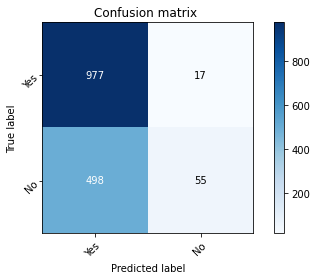

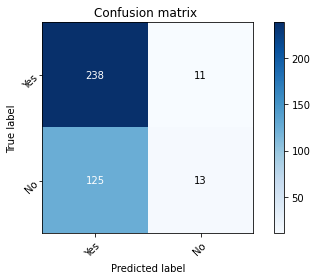

In [ ]:
print("Trenujący:")


print_results(calculate_metrics(y_train.values, y_pred_train_lr), 'Logistic Regression')
cm = confusion_matrix(y_train, y_pred_train_lr)
plot_confusion_matrix(cm, ["Yes", "No"])

print("Testowy:")

print_results(calculate_metrics(y_test.values, y_pred_lr), 'Logistic Regression')
cm = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm, ["Yes", "No"])

## Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

searcher_clf = GridSearchCV(clf, {'n_estimators':[100, 50, 200, 300], 'criterion':["gini", "entropy"], "min_samples_split": [2, 3, 4]})

searcher_clf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 200, 300]})

In [ ]:
print("Best CV params", searcher_clf.best_params_)

Best CV params {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 50}


In [ ]:
y_pred_train_clf = searcher_clf.predict(X_train)
y_pred_clf = searcher_clf.predict(X_test)
print(y_pred_clf)

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0]


Trenujący:
Results for Random Forest
----
  Accuracy:  0.8067226890756303
  Precision: 0.802422977712083
  Recall:    0.7657591116318162
  F1 score:  0.77757693874185
  Mislabeled 299 out of 1547


Testowy:
Results for Random Forest
----
  Accuracy:  0.4780361757105943
  Precision: 0.3574794770446944
  Recall:    0.3908678191024969
  F1 score:  0.36879077578967767
  Mislabeled 202 out of 387




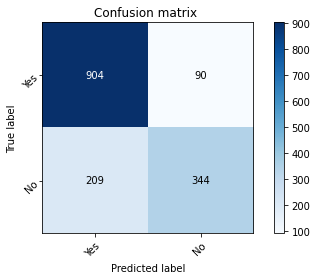

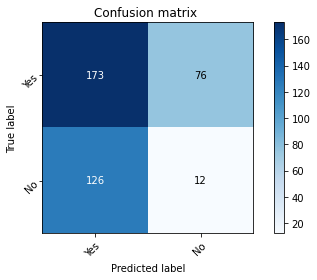

In [ ]:
print("Trenujący:")


print_results(calculate_metrics(y_train.values, y_pred_train_clf), 'Random Forest')
cm = confusion_matrix(y_train, y_pred_train_clf)
plot_confusion_matrix(cm, ["Yes", "No"])

print("Testowy:")

print_results(calculate_metrics(y_test.values, y_pred_clf), 'Random Forest')
cm = confusion_matrix(y_test, y_pred_clf)
plot_confusion_matrix(cm, ["Yes", "No"])

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier()

searcher_boost = GridSearchCV(boost, {'n_estimators':[30, 50, 100], 'learning_rate':[1, 2]})

searcher_boost.fit(X_train, y_train)

print("Best CV params", searcher_boost.best_params_)


Best CV params {'learning_rate': 1, 'n_estimators': 30}


In [ ]:
y_pred_train_boost = searcher_boost.predict(X_train)
y_pred_boost = searcher_boost.predict(X_test)
print(y_pred_boost)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


Trenujący:
Results for AdaBoost
----
  Accuracy:  0.6851971557853911
  Precision: 0.6772918211020509
  Recall:    0.5861498102539286
  F1 score:  0.5718390559635097
  Mislabeled 487 out of 1547


Testowy:
Results for AdaBoost
----
  Accuracy:  0.6459948320413437
  Precision: 0.588235294117647
  Recall:    0.5440020953378732
  F1 score:  0.5204721204721204
  Mislabeled 137 out of 387




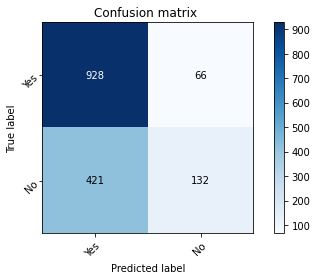

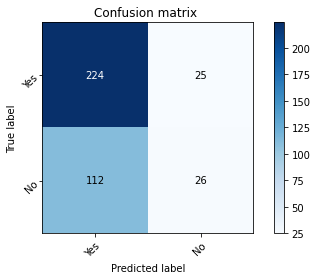

In [ ]:
print("Trenujący:")


print_results(calculate_metrics(y_train.values, y_pred_train_boost), 'AdaBoost')
cm = confusion_matrix(y_train, y_pred_train_boost)
plot_confusion_matrix(cm, ["Yes", "No"])

print("Testowy:")

print_results(calculate_metrics(y_test.values, y_pred_boost), 'AdaBoost')
cm = confusion_matrix(y_test, y_pred_boost)
plot_confusion_matrix(cm, ["Yes", "No"])

In [ ]:
import joblib

lr_filename = "lr_model.pkl"
joblib.dump(searcher_lr, lr_filename)

clf_filename = "clf_model.pkl"
joblib.dump(searcher_clf, clf_filename)

boost_filename = "boost_model.pkl"
joblib.dump(searcher_boost, boost_filename)

['boost_model.pkl']

In [ ]:
searcher_lr, searcher_clf, searcher_boost

(GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=30),
              param_grid={'C': [0.002, 0.02, 0.2, 2, 20, 100]}),
 GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 50, 200, 300]}),
 GridSearchCV(estimator=AdaBoostClassifier(),
              param_grid={'learning_rate': [1, 2],
                          'n_estimators': [30, 50, 100]}))

## Przygotowanie zbioru test_df

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1323 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            147 non-null    int64  
 1   Age                       147 non-null    float64
 2   BusinessTravel            147 non-null    object 
 3   DailyRate                 147 non-null    float64
 4   Department                147 non-null    object 
 5   DistanceFromHome          147 non-null    float64
 6   Education                 147 non-null    float64
 7   EducationField            147 non-null    object 
 8   EmployeeCount             147 non-null    float64
 9   EnvironmentSatisfaction   147 non-null    float64
 10  Gender                    147 non-null    object 
 11  HourlyRate                147 non-null    float64
 12  JobInvolvement            147 non-null    float64
 13  JobLevel                  147 non-null    float64
 14  JobRol

In [ ]:
new_test = test_df.drop_duplicates(subset=test_df.columns.difference(['EmployeeNumber']))

In [ ]:
new_test

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1323,100000,35.0,Travel_Rarely,1343.0,Research & Development,27.0,1.0,Medical,1.0,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,17852.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0
1324,100001,27.0,Travel_Rarely,1220.0,Research & Development,5.0,3.0,Life Sciences,1.0,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,20938.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0
1325,100002,24.0,Travel_Rarely,1476.0,Sales,4.0,1.0,Medical,1.0,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,15211.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0
1326,100003,37.0,Non-Travel,142.0,Sales,9.0,4.0,Medical,1.0,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,24666.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0
1327,100004,33.0,Travel_Rarely,527.0,Research & Development,1.0,4.0,Other,1.0,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,5207.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,Non-Travel,208.0,Research & Development,8.0,4.0,Life Sciences,1.0,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0
1466,100143,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0
1467,100144,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0
1468,100145,44.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0


In [ ]:
test_df2 = test_df.drop("Attrition", axis = 1)

In [ ]:
# określamy co jest naszym X

# columns_X_test = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
#        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
#        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
#        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
#        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
#        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
#        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
#        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
#        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
#        'YearsWithCurrManager', 'YearlyIncome']

# X_temp = test_df2[columns_X_test]

X_temp = test_df2.loc[:, test_df2.columns != "EmployeeNumber"]

In [ ]:
X_temp.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
1323,35.0,Travel_Rarely,1343.0,Research & Development,27.0,1.0,Medical,1.0,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,17852.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,30708.0
1324,27.0,Travel_Rarely,1220.0,Research & Development,5.0,3.0,Life Sciences,1.0,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,20938.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,29736.0
1325,24.0,Travel_Rarely,1476.0,Sales,4.0,1.0,Medical,1.0,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,15211.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,49944.0
1326,37.0,Non-Travel,142.0,Sales,9.0,4.0,Medical,1.0,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,24666.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,106008.0
1327,33.0,Travel_Rarely,527.0,Research & Development,1.0,4.0,Other,1.0,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,5207.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,32232.0
